In [24]:
# Import packages
import matplotlib.pyplot as plt 
import seaborn as sns 
colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background')

import numpy as np
import pandas as pd

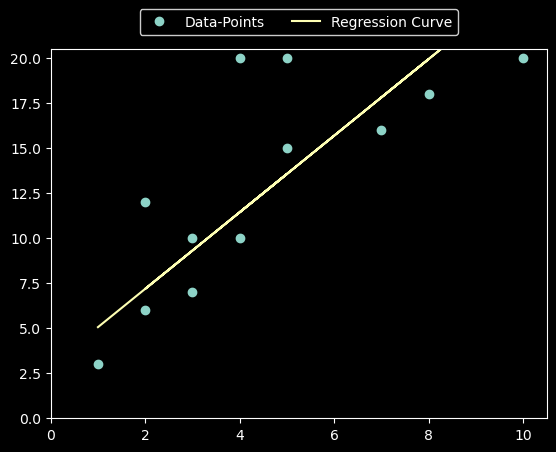

In [25]:
# Activation Function
def linear_function (X, M, B): 
    Y=M*float(X)+B 
    return Y

# Random data points
[x, y] = [[1, 2, 3, 4, 5, 4, 5, 10, 3, 2, 8, 7] , [3, 12, 10, 10, 20, 20, 15, 20, 7, 6, 18, 16]] 

# Hyperparameter
Learning_rate = 0.01
epochs = range(0,100)

# Starting Values
b = 1; m = 0

# Protocol
protocol=[]

# Optimize linear regression
for k in epochs:

    # Starting Values
    dMSE_db = 0
    dMSE_dm = 0
    MSE = 0

    # For each data point
    for i in range(0,len(x)):

        # Calculate derivatives of MSE (Mean Squared Error)
        dMSE_db = dMSE_db - 2/len(x) * (y[i] - m*x[i] - b)
        dMSE_dm = dMSE_dm - 2*x[i]/len(x) * (y[i] - m*x[i] - b)

        # Calculate y
        ys = linear_function(x[i], m, b)

        # Calculate Mean Squared Error
        MSE=MSE + 1/len(x)*(ys-y[i])**2

    # Update protocol
    protocol.append([b, m, MSE,  dMSE_db, dMSE_dm]) 

    # Backpropagation: Calculate b, m
    Stepsize_b = Learning_rate * dMSE_db
    b = b - Stepsize_b
    Stepsize_m = Learning_rate * dMSE_dm
    m = m - Stepsize_m

    # Clear plot
    plt.clf()

    # Axis scales
    plt.xlim(0, max(x)+0.5)
    plt.ylim(0, max(y)+0.5)

    # Plot data points
    plt.plot(x, y, 'o', label="Data-Points")

    # Plot linear regression
    y_result = [linear_function(i, m, b) for i in x]
    plt.plot(x, y_result, label="Regression Curve") 

    # Plot legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.125),
        fancybox=True, shadow=True, ncol=5)

    # Plot show
    #plt.show() 

In [26]:
import pandas as pd 

df=pd.DataFrame(protocol, columns=["b", "m", "MSE",  "dMSE_db", "dMSE_dm"])
print(df) 

           b         m         MSE    dMSE_db     dMSE_dm
0   1.000000  0.000000  178.416667 -24.166667 -131.166667
1   1.241667  1.311667   49.606652 -11.878333  -58.598889
2   1.360450  1.897656   23.712077  -6.366867  -26.081769
3   1.424119  2.158473   18.482989  -3.892170  -11.511535
4   1.463040  2.273589   17.403767  -2.778289   -4.983382
..       ...       ...         ...        ...         ...
95  2.870618  2.134231   14.924565  -1.217348    0.205983
96  2.882791  2.132172   14.909358  -1.211539    0.205000
97  2.894907  2.130122   14.894295  -1.205759    0.204022
98  2.906964  2.128081   14.879376  -1.200005    0.203048
99  2.918964  2.126051   14.864599  -1.194280    0.202080

[100 rows x 5 columns]


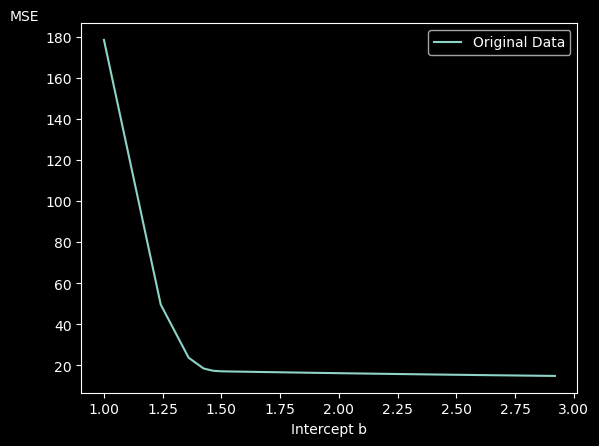

In [27]:
### MSE über b PLOTTEN ### 

plt.plot(list(df['b']), list(df['MSE']) , label="Original Data")
plt.xlabel('Intercept b', loc='center')
plt.ylabel('MSE', rotation=0, loc='top') 
plt.legend() 
plt.show()

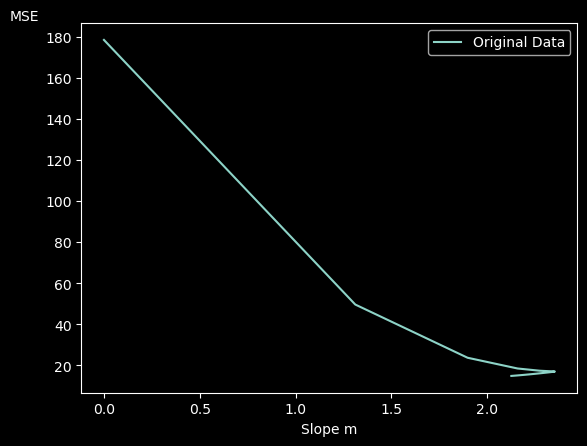

In [28]:
### MSE über m PLOTTEN ### 

plt.plot(list(df['m']), list(df['MSE']), label="Original Data")
plt.xlabel('Slope m', loc='center')
plt.ylabel('MSE', rotation=0, loc='top')
plt.legend() 
plt.show()

Sxx = 79.0
Syy = 388.9166666666667
Sxy = 134.5

MSE = 13.327180028129394


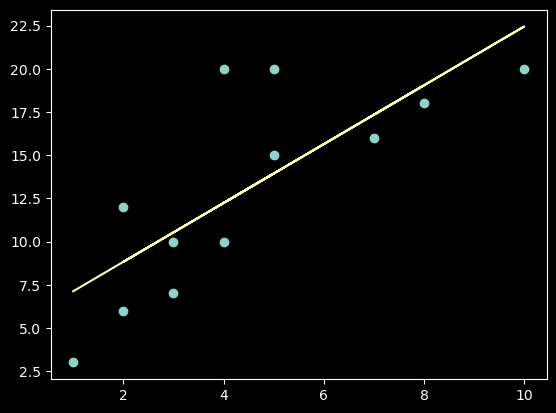

In [29]:
### ADD Correct Regression 

x_values, y_values = x, y

### Sxx bzw. Syy berechnen 
def CalcSxx (liste): 
    ### Mittelwert berechnen von X-Werten
    i_ = sum(liste)/len(liste) 
    ### Tabelle um Regressionsgerade zu berechnen
    columns = ['x', 'x-x_', '(x-x_)^2'] 
    table = [] 

    for i in liste: 
        # print('Für x = {} und x - x_ = {} gilt die quadratische Abweichung: {}'.format(i, i-i_, (i - i_)**2)
        table.append([i, i-i_,(i - i_)**2]) 

    np_array = np.array(table) # aus liste machen wir array 
    df = pd.DataFrame(np_array, columns=columns) 
    Sxx = sum(df['(x-x_)^2']) 
    return i_, Sxx, df # Weird hier scheint die Reihenfolge wichtig zu sein 

### Print Sxx / Syy ###
x_, Sxx, df_x = CalcSxx(x_values) 
fuck, Syy, df_y = CalcSxx(y_values) 
print('Sxx = {}'.format(Sxx)) 
print('Syy = {}'.format(Syy)) 

### Sxy berechnen
df2 = pd.concat([df_x['x-x_'], df_y['x-x_']], axis=1)
df2.columns=['x-x_', 'y-y_'] # rename columns
df2['Values'] = df2['x-x_'] * df2['y-y_'] # mnultiply rows
Sxy = sum(df2['Values']) 

### Print Sxy ###
print('Sxy = {}\n'.format(Sxy)) 
### ------------------- ###

### Berechnung der Geraden
M = Sxy / Sxx ; B = fuck - M * x_ 

def linear_gradient (X): 
    y=M*float(X)+B 
    return y 

### MEAN SQUARE ERROR ### mse = 1/n * (y_ - y)**2 # Jeder Datenpunkt wird durchgegangen y_ - y
MSE = 0 
for i in range(0,len(x_values)): 
    #print('Y-Wert real = {} and forecast = {}'.format(y_values[i], linear_gradient(x_values[i])))
    MSE=MSE+1/len(x_values)*((linear_gradient(x_values[i])-y_values[i]))**2 
print('MSE = {}'.format(MSE)) 

### PLOTTEN ### 
x_regression = [] ; y_regression_correct = [] 
for i in range(0,len(x_values)): 
    y_regression_correct.append(linear_gradient(x_values[i])) 

colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background') # for customizing theme
plt.plot(x_values, y_values, 'o', label="Original Data") 
plt.plot(x_values, y_regression_correct, label="Regression Curve")

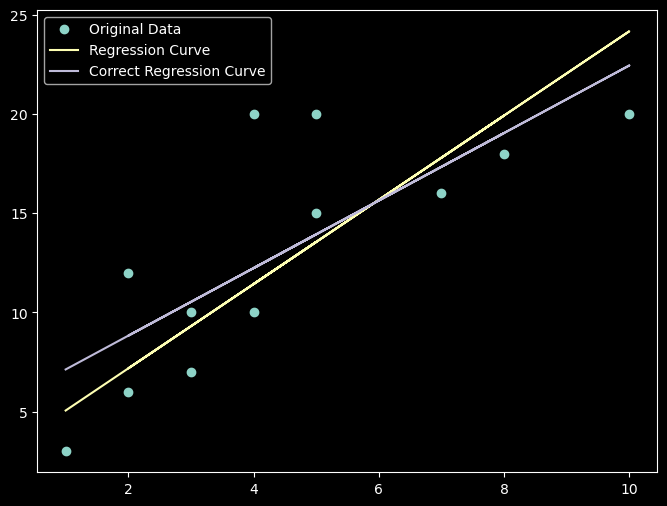

In [32]:
# Plot curves 

fig = plt.figure(figsize=(8, 6)) # width, height
plt.plot(x, y, 'o', label="Original Data")  

plt.plot(x, y_result, label="Regression Curve") 

plt.plot(x_values, y_regression_correct, label="Correct Regression Curve") 

plt.legend()
plt.show() 